# Unicorn Companies
Private companies with a valuation over $1 billion as of March 2022, including each company's current valuation, funding, country of origin, industry, select investors, and the years they were founded and became unicorns.

### Recommended Analysis
1. Which unicorn companies have had the biggest return on investment?
2. How long does it usually take for a company to become a unicorn? Has it always 
been this way?
3. Which countries have the most unicorns? Are there any cities that appear to be 
industry hubs?
4. Which investors have funded the most unicorns?

In [78]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [44]:
# Load the dataset
data = pd.read_csv('UnicornC.csv')

In [45]:
data.head(5)

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [47]:
data.shape

(1074, 10)

In [48]:
#display the count of null values for each variable of 'unicorn_Companie' dataset
data.isnull().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64

In [49]:
data['City'].fillna('Unknown',inplace = True)

In [50]:
data['Select Investors'].fillna('Unknown',inplace = True)

In [51]:
data.isnull().sum()

Company             0
Valuation           0
Date Joined         0
Industry            0
City                0
Country             0
Continent           0
Year Founded        0
Funding             0
Select Investors    0
dtype: int64

In [52]:
#data.loc[data["Year Founded"] == "None","Year Founded"] = 0
#data["Year Founded "] = data["Year Founded"].astype(int)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1074 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1074 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [54]:
# Remove Dollar sign and convert to float
data["Valuation (B)"] = data["Valuation"].replace({"\$": ""},regex=True)

data.loc[data["Valuation"].str.endswith('B'),"Valuation"] = (data[data["Valuation"].str.endswith('B')]["Valuation (B)"].replace({"B":""},regex=True).astype(float)* 1_000_000_000).astype(str)

data['Valuation (B)'] = data['Valuation'].astype(float)

In [55]:
# Remove dollar sign 
data["Funding"] = data["Funding"].replace({"\$": ""},regex=True)

# Transform the Funding that ends with B by multiply with 10^9 and convert type back to string for preventing type error
data.loc[data["Funding"].str.endswith('B'),"Funding"] = (data[data["Funding"].str.endswith('B')]["Funding"].replace({"B":""},regex=True).astype(float) * 1_000_000_000).astype(str) 

# Transform the Funding that ends with M by multiply with 10^6 and convert type back to string for preventing type error
data.loc[data["Funding"].str.endswith('M'),"Funding"] = (data[data["Funding"].str.endswith('M')]["Funding"].replace({"M":""},regex=True).astype(float) * 1_000_000).astype(str)

# Transform the Funding that ends with K by multiply with 10^3 and convert type back to string for preventing type error
data.loc[data["Funding"].str.endswith('K'),"Funding"] = (data[data["Funding"].str.endswith('K')]["Funding"].replace({"K":""},regex=True).astype(float) * 1_000).astype(str)

# Transform the Funding that has value is None to be 0
data.loc[data["Funding"] == "Unknown","Funding"] = "0"

# Convert Funding column to be float 
data["Funding (B)"] = data["Funding"].astype(float)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1074 non-null   object 
 1   Valuation         1074 non-null   object 
 2   Date Joined       1074 non-null   object 
 3   Industry          1074 non-null   object 
 4   City              1074 non-null   object 
 5   Country           1074 non-null   object 
 6   Continent         1074 non-null   object 
 7   Year Founded      1074 non-null   int64  
 8   Funding           1074 non-null   object 
 9   Select Investors  1074 non-null   object 
 10  Valuation (B)     1074 non-null   float64
 11  Funding (B)       1074 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 100.8+ KB


In [57]:
data['Date Joined']

0       2017-04-07
1       2012-12-01
2       2018-07-03
3       2014-01-23
4       2011-12-12
           ...    
1069    2017-06-29
1070    2017-04-18
1071    2021-05-06
1072    2021-10-19
1073    2020-09-16
Name: Date Joined, Length: 1074, dtype: object

Extract year joined from the date joined.

In [58]:
data['Date Joined'] = pd.to_datetime(data['Date Joined'], format='%Y/%m/%d')

In [59]:
data["Year Joined"] = data["Date Joined"].apply(lambda x: x.year)

In [60]:
data['Year Joined']

0       2017
1       2012
2       2018
3       2014
4       2011
        ... 
1069    2017
1070    2017
1071    2021
1072    2021
1073    2020
Name: Year Joined, Length: 1074, dtype: int64

######  How long does it usually take for a company to become a unicorn? Has it always been this way?

In [61]:
# Calculate the number of years it takes for a company to become a unicorn
data["Year to Unicorn"] = data["Year Joined"] - data["Year Founded"]

# Replace any negative values with 0
data.loc[data["Year to Unicorn"] < 0,"Year to Unicorn"] = 0

# Calculate the average number of years it takes for a company to become a unicorn
average_years_to_unicorn = data["Year to Unicorn"].mean()

# Display the average number of years it takes for a company to become a unicorn
print("The average number of years it takes for a company to become a unicorn is:", round(average_years_to_unicorn, 2))

The average number of years it takes for a company to become a unicorn is: 7.0


In [62]:
data[['Industry','Company', 'Year to Unicorn']]

,Industry,Company,Year to Unicorn
0,Artificial intelligence,Bytedance,5
1,Other,SpaceX,10
2,E-commerce & direct-to-consumer,SHEIN,10
3,Fintech,Stripe,4
4,Fintech,Klarna,6
...,...,...,...
1069,E-commerce & direct-to-consumer,Zhaogang,5
1070,E-commerce & direct-to-consumer,Zhuan Zhuan,2
1071,Consumer & retail,Zihaiguo,3
1072,Fintech,Zopa,16


In [63]:
import plotly.express as px

# Group the data by the 'Year Founded' column and calculate the mean 'Year to Unicorn'
avg_years_to_unicorn = data.groupby('Year Founded')['Year to Unicorn'].mean().reset_index()

# Create a line chart using Plotly Express
fig = px.line(avg_years_to_unicorn,
              x='Year Founded',
              y='Year to Unicorn',
              title='Average Years to Unicorn')

# Display the chart
fig.show()

From the plot above, we can see that the average number of years to unicorn has been decreasing over time, this suggests that it has become easier for companies to achieve unicorn status more quickly.

###### Which are the top valuation unicorn companies?

In [64]:
import plotly.express as px

# Load the data into a DataFrame called 'data'

# Select the top 10 companies by valuation
top10_valuation_company = data.sort_values("Valuation (B)", ascending=False)[:10]

# Create a bar chart using Plotly Express
fig = px.bar(top10_valuation_company, 
             x="Company", 
             y="Valuation (B)",
             title="Top 10 most valuation unicorn companies",
             color="Company")

# Display the chart
fig.show()

The bar chart of the top 10 companies based on their valuation reveals that the company with the highest valuation is Bytedance, which stands out from the rest of the companies. The second and third companies with the most valuation are SpaceX and Stripe, respectively, and their values are similar to each other. Furthermore, there are other companies that have comparable valuations.

###### Geographic Distribution of Unicorns: - Identify the countries with the highest number of unicorn companies. 

In [65]:
import plotly.express as px

# Group the DataFrame by country and sum the valuation values
groupby_country = data.groupby("Country")["Valuation (B)"].sum()

# Select the top 10 countries by valuation
top10_valuation_country = groupby_country.sort_values(ascending=False)[:10]

# Reset the index of the resulting DataFrame
top10_valuation_country = top10_valuation_country.reset_index()

# Create a bar chart using Plotly Express
fig = px.bar(top10_valuation_country, 
             x="Country", 
             y="Valuation (B)",
             title="Top 10 countries based on valuation of unicorn company",
             color="Country")

fig.update_yaxes(title_text="Valuation")

# Display the chart
fig.show()

The bar chart of the top 10 countries based on the valuation of unicorn companies reveals that the United States has the highest total valuation, which stands out from the rest of the countries. China is the second country with the highest valuation, and its valuation is considerably lower than that of the United States. Other countries in the top 10 have comparable valuations.

###### Are there any cities that appear to be industry hubs?

In [66]:
import plotly.express as px

# Group the DataFrame by country and city, and sum the valuation values
groupby_country_city = data.groupby(["Country", "City"])["Valuation (B)"].sum()

# Select the top 10 countries by valuation
top10_valuation_country = groupby_country_city.groupby("Country").sum().sort_values(ascending=False)[:10]

# Reset the index of the resulting DataFrame
top10_valuation_country = top10_valuation_country.reset_index()

# Create a bar chart using Plotly Express
fig = px.bar(top10_valuation_country, 
             x="Country", 
             y="Valuation (B)",
             title="Top 10 countries based on city and valuation of unicorn companies",
             color="Country")

# Change the label on the x-axis
fig.update_yaxes(title_text="Valuation")

# Display the chart
fig.show()

###### Industry Analysis: - Determine which industries have the highest representation among unicorn companies. Are there specific sectors that are more likely to produce unicorns?

In [67]:
# Group the data by the 'Industry' column and count the number of unicorn companies in each industry
unicorn_count_by_industry = data['Company'].groupby(data['Industry']).count().reset_index()

# Sort the industries by the number of unicorn companies in descending order
unicorn_count_by_industry = unicorn_count_by_industry.sort_values(by='Company', ascending=False)

# Select the top N industries for visualization, e.g., the top 10
top_industries = unicorn_count_by_industry.head(10)
            
print(top_industries)

                               Industry  Company
8                               Fintech      224
11         Internet software & services      205
6       E-commerce & direct-to-consumer      111
10                               Health       74
1               Artificial intelligence       73
13                                Other       58
14  Supply chain, logistics, & delivery       57
4                         Cybersecurity       50
5           Data management & analytics       41
12          Mobile & telecommunications       38


In [68]:
import plotly.express as px

# Group the data by the 'Industry' column and count the number of unicorn companies in each industry
unicorn_count_by_industry = data['Company'].groupby(data['Industry']).count().reset_index()

# Sort the industries by the number of unicorn companies in descending order
unicorn_count_by_industry = unicorn_count_by_industry.sort_values(by='Company', ascending=False)

# Select the top N industries for visualization, e.g., the top 10
top_industries = unicorn_count_by_industry.head(10)

# Create a bar chart using Plotly Express
fig = px.bar(top_industries,
             x='Industry',
             y='Company',
             title='Top 10 Industries with the Most Unicorn Companies',
             color="Industry")

# Display the chart
fig.show()

From the bar chart, we can see that the Fintech, Internet Software & Services industries produce most Unicorn Companies.

###### Which investors have funded the most unicorns?

In [69]:
# Load the data into a DataFrame
data = pd.read_csv('UnicornC.csv')

# Split the 'Investors' column into a list of investors for each company
data['Select Investors'] = data['Select Investors'].str.split(', ')

# Create a new DataFrame that has one row for each investor in each company
investor_data = data.explode('Select Investors')

# Group the DataFrame by investor and count the number of companies they have invested in
investor_count = investor_data.groupby('Select Investors')['Company'].count().reset_index()

# Sort the investors by the number of companies they have invested in, in descending order
top_investors = investor_count.sort_values('Company', ascending=False)

# Display the top 10 investors
top_investors.head(10)

,Select Investors,Company
26,Accel,60
1110,Tiger Global Management,53
80,Andreessen Horowitz,53
976,Sequoia Capital China,48
975,Sequoia Capital,47
588,Insight Partners,47
1021,SoftBank Group,34
684,Lightspeed Venture Partners,34
466,General Catalyst,33
578,Index Ventures,32


In [70]:
# Load the data into a DataFrame
data = pd.read_csv('UnicornC.csv')

# Split the 'Investors' column into a list of investors for each company
data['Investors'] = data['Select Investors'].str.split(', ')

# Create a new DataFrame that has one row for each investor in each company
investor_data = data.explode('Investors')

# Group the DataFrame by investor and count the number of companies they have invested in
investor_count = investor_data.groupby('Investors')['Company'].count().reset_index()

# Sort the investors by the number of companies they have invested in, in descending order
top_investors = investor_count.sort_values('Company', ascending=False)

# Create a bar chart using Plotly Express
fig = px.bar(top_investors.head(10), 
             x="Investors", 
             y="Company",
             title="Top 10 Investors Who Have Funded the Most Unicorns",
             color='Investors')

# Display the chart
fig.show()

We can see that Accel has funded most companies.

In [71]:
data[["Valuation","Funding"]]

,Valuation,Funding
0,$180B,$8B
1,$100B,$7B
2,$100B,$2B
3,$95B,$2B
4,$46B,$4B
...,...,...
1069,$1B,$379M
1070,$1B,$990M
1071,$1B,$80M
1072,$1B,$792M


In [72]:
# Remove Dollar sign and convert to float
data["Valuation"] = data["Valuation"].replace({"\$": ""},regex=True)

data.loc[data["Valuation"].str.endswith('B'),"Valuation"] = (data[data["Valuation"].str.endswith('B')]["Valuation"].replace({"B":""},regex=True).astype(float)* 1_000_000_000).astype(str)

data['Valuation'] = data['Valuation'].astype(float)

In [73]:
# Remove dollar sign 
data["Funding"] = data["Funding"].replace({"\$": ""},regex=True)

# Transform the Funding that ends with B by multiply with 10^9 and convert type back to string for preventing type error
data.loc[data["Funding"].str.endswith('B'),"Funding"] = (data[data["Funding"].str.endswith('B')]["Funding"].replace({"B":""},regex=True).astype(float) * 1_000_000_000).astype(str) 

# Transform the Funding that ends with M by multiply with 10^6 and convert type back to string for preventing type error
data.loc[data["Funding"].str.endswith('M'),"Funding"] = (data[data["Funding"].str.endswith('M')]["Funding"].replace({"M":""},regex=True).astype(float) * 1_000_000).astype(str)

# Transform the Funding that ends with K by multiply with 10^3 and convert type back to string for preventing type error
data.loc[data["Funding"].str.endswith('K'),"Funding"] = (data[data["Funding"].str.endswith('K')]["Funding"].replace({"K":""},regex=True).astype(float) * 1_000).astype(str)

# Transform the Funding that has value is None to be 0
data.loc[data["Funding"] == "Unknown","Funding"] = "0"

# Convert Funding column to be float 
data["Funding"] = data["Funding"].astype(float)

In [74]:
data[['Valuation','Funding']]

,Valuation,Funding
0,1.800000e+11,8.000000e+09
1,1.000000e+11,7.000000e+09
2,1.000000e+11,2.000000e+09
3,9.500000e+10,2.000000e+09
4,4.600000e+10,4.000000e+09
...,...,...
1069,1.000000e+09,3.790000e+08
1070,1.000000e+09,9.900000e+08
1071,1.000000e+09,8.000000e+07
1072,1.000000e+09,7.920000e+08


###### Which unicorn companies have had the biggest return on investment?

In [75]:
# Calculate the return on investment (ROI) for each company
data['ROI'] = data['Valuation'] - data['Funding'] /data['Funding']

# Sort the companies by ROI in descending order
top_roi_companies = data.sort_values('ROI', ascending=False)
top_roi_companies2 = top_roi_companies.head(5)

# Display the top 10 companies by ROI
top_roi_companies2[['Company', 'ROI', 'Industry', 'Country', 'Select Investors']]

,Company,ROI,Industry,Country,Select Investors
0,Bytedance,1.800000e+11,Artificial intelligence,China,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,1.000000e+11,Other,United States,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,1.000000e+11,E-commerce & direct-to-consumer,China,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,9.500000e+10,Fintech,United States,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,4.600000e+10,Fintech,Sweden,"Institutional Venture Partners, Sequoia Capita..."


###### Funding Trends Over Time: - Analyze the funding trends over the years. Are unicorn companies receiving more funding in recent years, or has the trend been relatively stable?

In [76]:
data['Funding']

0       8.000000e+09
1       7.000000e+09
2       2.000000e+09
3       2.000000e+09
4       4.000000e+09
            ...     
1069    3.790000e+08
1070    9.900000e+08
1071    8.000000e+07
1072    7.920000e+08
1073    6.200000e+08
Name: Funding, Length: 1074, dtype: float64

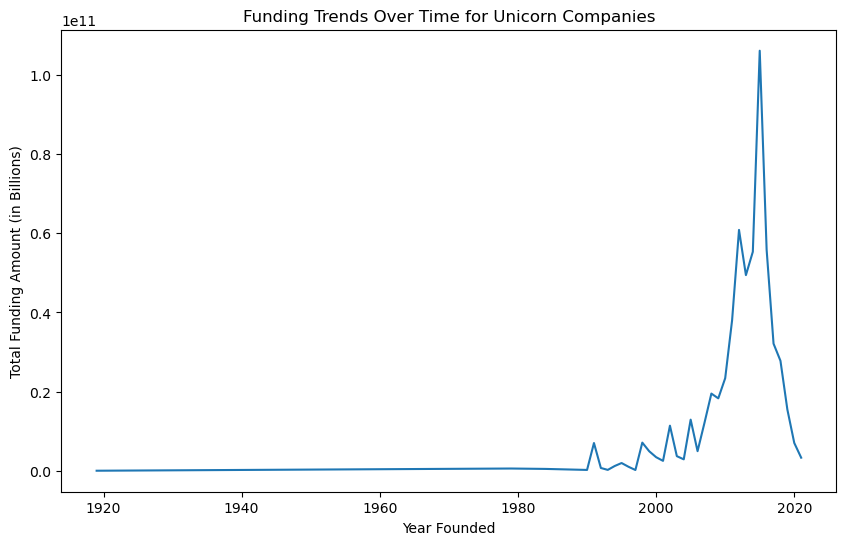

In [77]:
# Group the data by the 'Year Founded' column and sum the funding for each year
funding_by_year = data.groupby('Year Founded')['Funding'].sum().reset_index()

# Create a line plot to visualize funding trends over time
plt.figure(figsize=(10, 6))
plt.plot(funding_by_year['Year Founded'], funding_by_year['Funding'])
plt.xlabel('Year Founded')
plt.ylabel('Total Funding Amount (in Billions)')
plt.title('Funding Trends Over Time for Unicorn Companies')
plt.grid(False)
plt.show()

We can see that the funding went up from year 2000 and started declining from around year 2019. The decline in funding could have been due to the COVID 19 pandemic.

### Recommendations:

* Invest in companies with high ROI: As per the analysis, it is recommended to invest in companies with high return on investment (ROI). This can help in generating more revenue in the long run.

* Focus on faster growth: The analysis shows that it takes an average of 6-7 years for a company to become a unicorn. However, some companies have achieved this status in less time. Therefore, it is recommended to focus on faster growth strategies to become a unicorn faster.

* Expand globally: The analysis shows that the United States and China have the most unicorns. However, there are also unicorns in other countries such as India, the United Kingdom, and Germany. Therefore, it is recommended to expand globally and invest in companies in different countries to generate more revenue.

* Partner with top investors: The analysis shows that some investors have funded the most unicorns. Therefore, it is recommended to partner with these top investors to increase the chances of success and generate more revenue.

###### Steps taken:

Loaded the data into a DataFrame using pd.read_csv().
Calculated the return on investment (ROI) for each company.
Displayed the top 5 companies by ROI.
Calculated the number of years it takes for a company to become a unicorn by subtracting the 'Year Founded' column from the 'Year Joined' column.
Replaced any negative values with 0 and calculated the average number of years it takes for a company to become a unicorn.
Grouped the DataFrame by country and summed the valuation values.
Selected the top 10 countries by valuation and created a bar chart using Plotly Express.

###### Challenges faced:
I encountered some challenges during data analysis like handling missing data, choosing appropriate statistical methods, and interpreting results accurately. But I managed well.